In [17]:
def IDreturn_imp(firstname, lastname):
    import pandas as pd
    import sys
    df_people = pd.read_csv("People.csv")
    dflist = list(df_people.query('nameFirst == @firstname and nameLast == @lastname').playerID)
    if (dflist[0] == dflist[-1]):
        return dflist[0]
    else:
        print('There are people having same first and last names.')
        birth_year = int(input('Please input the Birth Year of the player you are trying to look up.'))
        dflist2 = list(df_people.query('nameFirst == @firstname and nameLast == @lastname and birthYear == @birth_year').playerID)
        if (dflist2[0] == dflist2[-1]):
            return dflist2[0]
        else:
            print('There are still people having same first and last names. Please input the Birth Month and Date of the player you are trying to look up')
            birth_month = int(input('Put the birth month.'))
            birth_day = int(input('Put the birth day.'))
            dflist3 = list(df_people.query('nameFirst == @firstname and nameLast == @lastname and birthYear == @birth_year and birthMonth == @birth_month and birthDay == @birth_day').playerID)
            return dflist3[0]
def PlayerRecordBatting(firstname, lastname, what):
    import pandas as pd
    import sys
    df_batting = pd.read_csv("Batting.csv")
    PlayID = IDreturn_imp(firstname, lastname)
    #l_columns = list(df_batting.columns)
    #lnumber = l_columns.index(what)
    #print(lnumber)
    new_list = df_batting.query('playerID == @PlayID')
    return(new_list[what])

def PlayerRecordPitching(firstname, lastname, what):
    import pandas as pd
    import sys
    df_pitching = pd.read_csv("Pitching.csv")
    PlayID = IDreturn_imp(firstname, lastname)
    new_list = df_pitching.query('playerID == @PlayID')
    return(new_list[what])

In [3]:
#以上三つにより各選手のID入手、打撃記録、投球記録を出せるようになった
#複数プレイヤーで比較し、グラフ化するものを作る

In [4]:
#プレイヤー名、比べたいもの、を入力してなんとか出そう

In [5]:
def compare_batting(what):
    n = int(input('Input the number of players you want to compare'))
    ply = []
    width = 0.3
    import matplotlib.pyplot as plt
    import numpy as np
    for i in range(n):
        print("You are now in the %i th player" %(i+1)) #数に関わらず全部thになるが仕方ない
        first = input('Input the first name of player you want to compare')
        last = input('Input the first name of player you want to compare')
        ply.append(list(PlayerRecordBatting(first, last, what)))
        blist = np.array([width * i] * len(list(PlayerRecordBatting(first, last, what)))) 
        #widthを足して棒グラフを重ねないように表示、for文ループをこれ以上増やすとアレなのでnumpyを使う
        plt.bar(np.array(list(range(len(list(PlayerRecordBatting(first, last, what)))))+ blist), ply[i], width=width)
    plt.show()

In [6]:
compare_batting('H') #メジャーデビュー年からのヒット数の比較、例としてイチロー、松井秀喜、ベーブルース

Input the number of players you want to compare


ValueError: invalid literal for int() with base 10: ''

In [7]:
#ここまで来たら通算も比較したいねえ
def compare_batting_accumulation(what):
    n = int(input('Input the number of players you want to compare'))
    ply = []
    width = 0.3
    import matplotlib.pyplot as plt
    import numpy as np
    for i in range(n):
        print("You are now in the %i th player" %(i+1)) #数に関わらず全部thになるが仕方ない
        first = input('Input the first name of player you want to compare')
        last = input('Input the first name of player you want to compare')
        ply.append(np.cumsum(list(PlayerRecordBatting(first, last, what)))) #numpyにおいてcumsumは累積和らしい。cumulative summaryかな
        blist = np.array([width * i] * len(list(PlayerRecordBatting(first, last, what)))) 
        #widthを足して棒グラフを重ねないように表示、for文ループをこれ以上増やすとアレなのでnumpyを使う
        plt.bar(np.array(list(range(len(list(PlayerRecordBatting(first, last, what)))))+ blist), ply[i], width=width)
    plt.show()

In [8]:
compare_batting_accumulation('H')

Input the number of players you want to compare


ValueError: invalid literal for int() with base 10: ''

In [9]:
compare_batting_accumulation('HR')

Input the number of players you want to compare


ValueError: invalid literal for int() with base 10: ''

In [10]:
#多分numpy配列にしたほうが何かと便利なので、すべてnumpyに統一する。

In [11]:
def IDreturn_imp(firstname, lastname):
    import pandas as pd
    import numpy as np
    import sys
    df_people = pd.read_csv("People.csv")
    dflist = list(df_people.query('nameFirst == @firstname and nameLast == @lastname').playerID)
    if (dflist[0] == dflist[-1]):
        return dflist[0]
    else:
        print('There are people having same first and last names.')
        birth_year = int(input('Please input the Birth Year of the player you are trying to look up.'))
        dflist2 = list(df_people.query('nameFirst == @firstname and nameLast == @lastname and birthYear == @birth_year').playerID)
        if (dflist2[0] == dflist2[-1]):
            return dflist2[0]
        else:
            print('There are still people having same first and last names. Please input the Birth Month and Date of the player you are trying to look up')
            birth_month = int(input('Put the birth month.'))
            birth_day = int(input('Put the birth day.'))
            dflist3 = list(df_people.query('nameFirst == @firstname and nameLast == @lastname and birthYear == @birth_year and birthMonth == @birth_month and birthDay == @birth_day').playerID)
            return dflist3[0]
        
def PlayerRecordBatting(firstname, lastname, what):
    import pandas as pd
    import numpy as np
    import sys
    df_batting = pd.read_csv("Batting.csv")
    PlayID = IDreturn_imp(firstname, lastname)
    new_list = df_batting.query('playerID == @PlayID')
    return(np.array(list(new_list[what])))

def PlayerRecordPitching(firstname, lastname, what):
    import pandas as pd
    import numpy as np
    import sys
    df_pitching = pd.read_csv("Pitching.csv")
    PlayID = IDreturn_imp(firstname, lastname)
    new_list = df_pitching.query('playerID == @PlayID')
    return(np.array(list(new_list[what])))

In [12]:
PlayerRecordBatting("Ichiro", "Suzuki", "H")

array([242, 208, 212, 262, 206, 224, 238, 213, 225, 214, 184, 105,  73,
       136, 102,  91,  95,  50])

In [13]:
def compare_batting(what):
    n = int(input('Input the number of players you want to compare'))
    ply = []
    width = 0.3
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import numpy as np
    for i in range(n):
        print("You are now in the %i th player" %(i+1)) #数に関わらず全部thになるが仕方ない
        first = input('Input the first name of player you want to compare')
        last = input('Input the first name of player you want to compare')
        siva = PlayerRecordBatting(first, last, what)
        ply.append(siva)
        blist = np.array([width * i] * len(list(siva))) 
        #widthを足して棒グラフを重ねないように表示、for文ループをこれ以上増やすとアレなのでnumpyを使う
        plt.bar(np.array(list(range(len(list(siva))))+ blist), ply[i], width=width, label="%s" %(first + " " + last))
        #ついでに凡例名を名前に、地味に苦労したがこれが一番うまくいく
        
    # X軸の数字が必ず整数になるようにする
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.legend()
    plt.show()

In [14]:
compare_batting('H')

Input the number of players you want to compare


ValueError: invalid literal for int() with base 10: ''

In [24]:
def compare_batting_accumulation(what):
    n = int(input('Input the number of players you want to compare'))
    ply = []
    width = 0.3
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import numpy as np
    for i in range(n):
        print("You are now in the %i th player" %(i+1)) #数に関わらず全部thになるが仕方ない
        first = input('Input the first name of player you want to compare')
        last = input('Input the first name of player you want to compare')
        siva = PlayerRecordBatting(first, last, what)
        ply.append(np.cumsum(siva)) #numpyにおいてcumsumは累積和らしい。cumulative summaryかな
        blist = np.array([width * i] * len(list(siva))) 
        #widthを足して棒グラフを重ねないように表示、for文ループをこれ以上増やすとアレなのでnumpyを使う
        plt.bar(np.array(list(range(len(list(siva))))+ blist), ply[i], width=width, label="%s" %(first + " " + last))
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.legend()
    plt.title("Comparison of %s" %what)
    plt.show()

In [ ]:
compare_batting_accumulation("H")

In [ ]:
compare_batting_accumulation("BB")

In [ ]:
compare_batting_accumulation("BB")

In [ ]:
compare_batting_accumulation("BB")

In [ ]:
#投手版

In [23]:
def compare_pitching(what):
    n = int(input('Input the number of players you want to compare'))
    ply = []
    width = 0.3
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import numpy as np
    for i in range(n):
        print("You are now in the %i th player" %(i+1)) #数に関わらず全部thになるが仕方ない
        first = input('Input the first name of player you want to compare')
        last = input('Input the first name of player you want to compare')
        siva = PlayerRecordPitching(first, last, what) #ここで関数呼び出しを終了させないと、のちの計算ですべて年号を入れる羽目になる
        ply.append(siva)
        blist = np.array([width * i] * len(list(siva))) 
        #widthを足して棒グラフを重ねないように表示、for文ループをこれ以上増やすとアレなのでnumpyを使う
        plt.bar(np.array(list(range(len(list(siva))))+ blist), ply[i], width=width, label="%s" %(first + " " + last))
        #ついでに凡例名を名前に、地味に苦労したがこれが一番うまくいく
        
    # X軸の数字が必ず整数になるようにする
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.legend()
    plt.show()

Input the number of players you want to compare2
You are now in the 1 th player
Input the first name of player you want to compareHideo
Input the first name of player you want to compareNomo
You are now in the 2 th player
Input the first name of player you want to compareRandy
Input the first name of player you want to compareJohnson
There are people having same first and last names.
Please input the Birth Year of the player you are trying to look up.1963


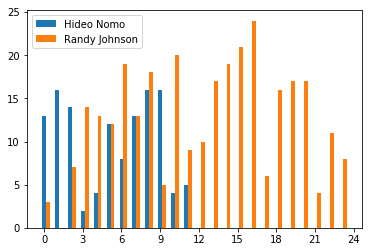

In [22]:
compare_pitching('W')

In [19]:
PlayerRecordPitching("Randy", "Johnson", "W")

There are people having same first and last names.
Please input the Birth Year of the player you are trying to look up.1963


26549     3
27030     0
27031     7
27527    14
28058    13
28540    12
29047    19
29574    13
30117    18
30706     5
31310    20
31892     9
31893    10
32523    17
33167    19
33841    21
34501    24
35173     6
35880    16
36545    17
37207    17
37897     4
38629    11
39328     8
Name: W, dtype: int64

In [20]:
compare_pitching('W')

Input the number of players you want to compare2
You are now in the 1 th player
Input the first name of player you want to compareHideo
Input the first name of player you want to compareNomo
You are now in the 2 th player
Input the first name of player you want to compareRandy
Input the first name of player you want to compareJohnson
There are people having same first and last names.
Please input the Birth Year of the player you are trying to look up.1963
There are people having same first and last names.
Please input the Birth Year of the player you are trying to look up.1963
There are people having same first and last names.
Please input the Birth Year of the player you are trying to look up.1963


In [25]:
def compare_pitching_accumulation(what):
    n = int(input('Input the number of players you want to compare'))
    ply = []
    width = 0.3
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import numpy as np
    for i in range(n):
        print("You are now in the %i th player" %(i+1)) #数に関わらず全部thになるが仕方ない
        first = input('Input the first name of player you want to compare')
        last = input('Input the first name of player you want to compare')
        siva = PlayerRecordPitching(first, last, what)
        ply.append(np.cumsum(siva)) #numpyにおいてcumsumは累積和らしい。cumulative summaryかな
        blist = np.array([width * i] * len(list(siva))) 
        #widthを足して棒グラフを重ねないように表示、for文ループをこれ以上増やすとアレなのでnumpyを使う
        plt.bar(np.array(list(range(len(list(siva))))+ blist), ply[i], width=width, label="%s" %(first + " " + last))
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.legend()
    plt.title("Comparison of %s" %what)
    plt.show()

Input the number of players you want to compare2
You are now in the 1 th player
Input the first name of player you want to compareHideo
Input the first name of player you want to compareNomo
You are now in the 2 th player
Input the first name of player you want to compareYu
Input the first name of player you want to compareDarvish


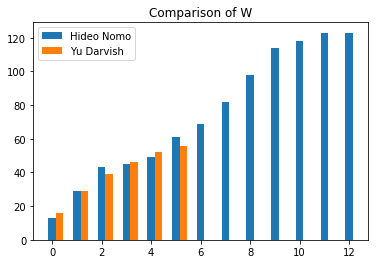

In [36]:
compare_pitching_accumulation('W')

In [30]:
compare_pitching_accumulation('W')

KeyboardInterrupt: 

In [31]:
compare_batting('OPS')

Input the number of players you want to compare2
You are now in the 1 th player
Input the first name of player you want to compareIchiro
Input the first name of player you want to compareSuzuki


KeyError: 'OPS'

In [32]:
compare_batting('avg')

Input the number of players you want to compare2
You are now in the 1 th player
Input the first name of player you want to compareIchiro
Input the first name of player you want to compareSuzuki


KeyError: 'avg'

In [33]:
IDreturn_imp("Ichiro", "Suzuki")

'suzukic01'

In [34]:
IDreturn_imp("Babe", "Ruth")

'ruthba01'

In [35]:
IDreturn_imp("Barry", "Bonds")

'bondsba01'